# Month 3 Retention

1. [Summary](#summary)
2. [About Khan Academy](#KA)
3. [Problem Statement](#problemstatement)
4. [Importing libraries](#libraries)
5. [Loading datasets](#loading)
6. [Exploratory Data Analysis](#EDA)

   - 6.1 [User dataset](#user)
     - 6.1.1 [Univariate analysis](#univariate)
     - 6.1.2 [Bivariate analysis](#bivariate)
    - 6.2 [Usage dataset](#usage)
      - 6.2.1 [Univariate analysis](#usageuni)
      - 6.2.2 [Most Engaging hours on platform](#engage)
    - 6.3 [Most popular learning path](#learningpath)
    - 6.4 [Time spent by Registered and Un-Registered Users](#time)
    - 6.5 [Outcome Dataset](#outcome)
        - 6.5.1 [Retained v/s Not-retained user distribution](#rrr)
        - 6.5.2 [Average time spent by retained v/s not retained users](#time-r)
    - 6.6 [User segments contribution to 3rd month retention](#segment)
        - 6.1 [User retention by user registration](#registered)
        - 6.2 [user retention by attributed_channel ](#ac)
        - 6.3 [User retention by domain](#rd)
        - 6.4 [User retention by course title](#rc)
        - 6.5 [ User retention by user activity](#ra)
        - 6.6 [User retention by client](#rclient)
        - 6.7 [User retention by region](#region)
        - 6.8 [User retention by hourly usage ](#bin)
7. [Recommendations to improve month 3 retention](#recom)
8. [Additional information: If I had access to more information, what other data points might I want to have to answer this question?](#info)
9. [Machine learning prediction model (Future scope)](#ML)
       

<a id='summary'></a>
# 1. Summary

In this case study, the primary objective is to conduct a comprehensive analysis of Khan Academy platform's user retention and engagement. The underlying approach involves leveraging a diverse set of data points, including user demographic information, activity data, content metrics, retention status, and more, to gain valuable insights into the platform's performance. 

The analysis focuses on understanding the factors that contribute to user retention, identifying areas of improvement, and formulating data-driven recommendations to enhance the platform's overall effectiveness. By examining user behavior, content preferences, engagement triggers, and other key metrics, the goal is to make informed decisions that lead to increased user retention, improved user experience, and sustained growth in the platform's user base.

Basically, I am interested in learning about the behavioral patterns of users in their first month of usage, particularly for any leading indicators of longer term engagement with the website.

Some questions, answer to which I aim to find from this case study, are:

1. What are the general usage patterns and behaviors for these users in their 1st month?

2. Are there any behaviors & usage patterns in the 1st month that correlate with month 3 retention?(i.e. choice of learning topic and long term engagement)

3. What recommendations would I make around how to improve month 3 retention? If I had access to more information, what other data points might I want to have to answer this question?

**Recommendation 1: Focus on user registration**
- The dataset contains around 90% unregistered users and 10% registered users in 1st month but my analysis shows that there is 22% chance of retaining a registered user as compared to only 8% in case of unregistered user. So, there are high chances of retaining a registered user. This is shown and explained in [User retention by user registration](#registered) section
     - I would recommend to focus on increasing user registration in their 1st month after joining. 
     - Retention Programs:
         - Encourage unregistered users to register by showcasing the benefits of registration such as personalized learning, progress tracking, and more. 
         - Offer incentives to boost registrations. 
         
**Recommendation 2: Strengthen Content and Domain-Specific Engagement:**
- The dataset contains various domains among which top 3 domains are Math, Science & Computing. These subjects covers 87.9% of total time spent by users in their 1st month.
    - My analysis shows that users that spent most time on Maths, Science and computing have higher changes of month 3 retention. This is shown and explained in [User retention by domain](#rd) section.
      - I recommend to ensure that the courses related to Math, Science, and Computing are engaging and informative
      - Consider leveraging machine learning algorithms to recommend relevant content that aligns with each user's interests, potentially increasing engagement and retention.
    - Target Marketting:
      - Focus marketing efforts on promoting courses in Math, Science, and Computing to reach the target audience more effectively.
      
**Recommendation 3: Long-term Learning Paths:**
- The platform provides various domains, courses and unit titles to users. I identified that few learning paths
  are having around 85% of the users time spent on them. These learning paths are explained and showed in [learning path](#learningpath) section
- I recommend to develop long-term learning paths or programs that guide users through a structured educational journey. 
- Provide milestones, badges, or certifications to incentivize and acknowledge user progress. This can help users stay engaged for extended periods.

**Recommendation 4: Optimize Organic Search and Direct Channel Strategies:**
- My analysis shows that 3rd month retention rate for organic search channel is 8.9% and for direct channel it is 12.2%. This analyis is explained in [User retention by attributed channel](#ac) section.
    - Focus on improving the content and search engine optimization (SEO) strategies to attract and engage users through these channels. 
     - Invest in keyword research and quality content creation to maintain or even improve retention rates in these channels.

**Recommendation 5: Localized Marketing and Outreach Campaigns:**
- I identified that few states like Maharashtra, UP & Karnataka shows higher overall users on the platform and also the retention rate of users in these states are high. This is explained in [user retention by region](#region) section. 
- I recommend to run targeted marketing and outreach campaigns that specifically cater to users in these states. 
  - Advertise using regional platforms, social media, and local events to increase awareness and drive user engagement. 
  - Offer region-specific promotions or incentives to attract and retain users.
  - Promote Regional Success Stories: Highlighting local success can inspire others and create a sense of community and motivation among users from the same region.

     
**Recommendation 6: User Segmentation and A/B Testing:**
- I recommend to segment users based on their behavior and preferences(as explained and concluded in this case study), and conduct A/B testing to understand what interventions are most effective. 
- Test different strategies for user engagement and retention, tracking the impact of changes on different user groups.    




<a id='KA'></a>
## 2. About Khan Academy

Khan Academy is an American non-profit educational organization created in 2006 by Sal Khan. Its goal is creating a set of online tools that help educate students.The organization produces short lessons in the form of videos. Its website also includes supplementary practice exercises and materials for educators. It has produced over 8,000 video lessons teaching a wide spectrum of academic subjects, including mathematics, sciences, literature, US history, and computer science. All resources are available for free to users of the website and application.

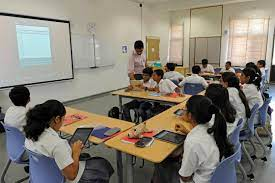  

<a id='problemstatement'></a>
## 3. Problem Statement

Khan Academy has a website and an application from where we have taken a sample dataset that **captures the usage behavior of a user cohort within their 1st month** of starting to use the learning platform. Through this case study, we want to learn about the **behavioral patterns** of users in their first month of usage and look for any leading indicators of longer term engagement with the platform. We will also deep dive into understanding the **factors leading to user retention after 3 months.**

<a id='libraries'></a>
## 4. Importing libraries

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Defining a custom color palette with subtle colors
custom_palette = ['steelblue', 'mediumseagreen', 'lightcoral', 'lightgoldenrodyellow', 'lightsalmon']

# Set the custom color palette as the default color cycle
sns.set_palette(custom_palette)

<a id='loading'></a>
## 5. Loading the data

Dataset contains 3 files as follows:

    1. user_data.csv: this file contains unique user's first time platform usage information. Like first use time, 
    registration status, city, region etc.
    2. usage_data.csv: this file contains user's platform usage behavior. Like amount of time spent on platform 
    watching videos, which domain, courses user spends time on etc.
    3. outcome_data.csv: this file contains data indicating 3rd month retention of user.

In [451]:
user = pd.read_csv('user_data.csv')
usage = pd.read_csv('usage_data.csv')
outcome = pd.read_csv('outcome_data.csv')

<a id='EDA'></a>
## 6. Exploratory Data Analysis (EDA) 


<a id='user'></a>
### 6.1 Analyzing basic metrics of user dataset

In [452]:
user.head()

,user_id,first_use_month,first_use_ts,is_registered_user,user_primary_type,country_cd,region,city,attributed_channel,referer_url
0,kaid_1172977777831184091024959,2021-01-01 00:00:00,2021-01-18 03:10:00,False,Unregistered Learner,IN,GA,Navelim,organic search,https://www.google.com/
1,kaid_1167642368311104946092969,2021-01-01 00:00:00,2021-01-04 06:13:35,False,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,https://www.khanacademy.org/math/in-in-class-1...
2,kaid_167569696178549414384138,2021-01-01 00:00:00,2021-01-24 17:22:43,False,Unregistered Learner,IN,MZ,Aizawl,other KA marketing,NaN
3,kaid_1030430879261145466031150,2021-01-01 00:00:00,2021-01-15 05:42:56,False,Unregistered Learner,IN,NL,Kohima,organic search,https://www.google.com/
4,kaid_826231243401218994536338,2021-01-01 00:00:00,2021-01-21 10:28:37,False,Unregistered Learner,IN,CH,Chandigarh,other KA marketing,NaN


In [453]:
user.shape

(7612, 10)

There is 7612 unique user's data an 10 columns present in dataset.

In [454]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7612 entries, 0 to 7611
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             7612 non-null   object
 1   first_use_month     7612 non-null   object
 2   first_use_ts        7612 non-null   object
 3   is_registered_user  7612 non-null   bool  
 4   user_primary_type   7612 non-null   object
 5   country_cd          7612 non-null   object
 6   region              7611 non-null   object
 7   city                7611 non-null   object
 8   attributed_channel  7612 non-null   object
 9   referer_url         5019 non-null   object
dtypes: bool(1), object(9)
memory usage: 542.8+ KB


**Dataset size:** The dataset consists of 7612 rows and 10 columns

**Data Types** The DataFrame contains a mix of data types, with most columns being of object data type.

**Null Values:** Some columns have null values. Let's handle null values in dataset

In [455]:
# creating a copy of user dataset to perform analysis
df_user = user.copy()

In [456]:
# checking total number of null values present in each column
df_user.isnull().sum()

user_id                  0
first_use_month          0
first_use_ts             0
is_registered_user       0
user_primary_type        0
country_cd               0
region                   1
city                     1
attributed_channel       0
referer_url           2593
dtype: int64

- Dataset contains null values in the **'region'**, **'city'**, and **'referer_url'** columns. In the 'region' and 'city' columns, only one value is null, so I can confidently drop the respective rows without affecting the overall data.

- Regarding the 'referer_url' column, its relevance seems limited as it contains URLs through which users accessed the KA platform. Upon examining the data in the 'referer_url' and 'attributed_channel' columns, it becomes evident that **'referer_url' is closely tied to the 'attributed_channel'.** 

- **For example,** if the channel is 'organic search', the 'referer_url' is 'google.com' or 'yahoo.com'. Similarly, if the attributed channel is 'intra_ka', the 'referer_url' points to a KA website link. Hence, I can proceed with the analysis using the 'attributed_channel' data, and the 'referer_url' column may not be essential for my analysis.

**Droping null values and taking only the important columns in df for analysis**
- column 'first_use_month' contains only 1 value (2021-01-01 00:00:00) for all the rows. So, I am removing this column from analysis dataset

- I am also excluding 'referer_url' as it don't add much value to my analysis (as explained above)

In [457]:
df_user.dropna(subset=['city','region'], inplace=True) #Droping null rows from 'city' and 'region' column
df_user.drop(['first_use_month','referer_url'], axis=1, inplace=True) #Droping un-wanted columns 

<a id='univariate'></a>
### 6.1.1  Univariate analysis (Column wise analysis)

Performing univariate analysis to understand the characteristics, properties, and distribution of a particular column without considering any relationships with other variables.

#### 6.1.1.1 Analyzing 'is_registered_user' column

- This column signifies whether a user is registered on the platform or not.
- I'm analyzing this column to determine the percentage distribution of registered and unregistered users.

In [458]:
#before analysis, I am replacing the boolean values present in column for better understanding
#True: registered
#False: un-registered
df_user['is_registered_user'] = np.where(df_user['is_registered_user'] == False, 'un-registered', 'registered')

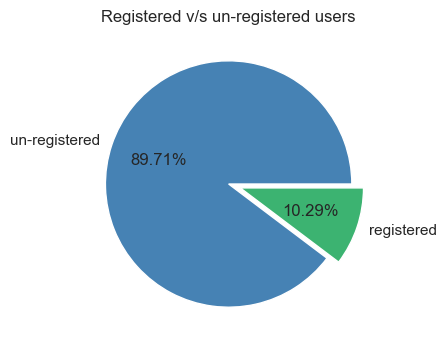

In [459]:
#finding percentage of registered v/s un-registered users.
reg_cnt = df_user['is_registered_user'].value_counts(normalize = True) * 100  
reg_pct = pd.DataFrame(reg_cnt.reset_index())

#Pie plot to visualize the distribution of Registered v/s non-registered users
plt.figure(figsize=(8,4))
plt.pie(reg_pct['proportion'], labels = reg_pct['is_registered_user'].value_counts().index, radius=1, autopct='%1.2f%%',
       explode = (0,0.1))
plt.title('Registered v/s un-registered users')
plt.show()

A significant majority **(89.70%)** of users are unregistered while a smaller percentage **(10.30%)** of users have registered on the platform.

#### 6.1.1.2 Analyzing 'user_primary_type' column 

- This column contains type of user accessing the platform. This includes registered and unregistered learners, teacher and parent.
- I am to find the percentage distribution of primary user type

In [460]:
df_user.user_primary_type.value_counts() # counting the number of unique users present in each category

user_primary_type
Unregistered Learner    6828
Registered Learner       723
Teacher                   39
Parent                    21
Name: count, dtype: int64

Here, I notice very few data is present for Teacher and Parent user type. For better analysis, if the percentage of users lying in these categories is less than 5%, I am combining them into a new category called 'others'

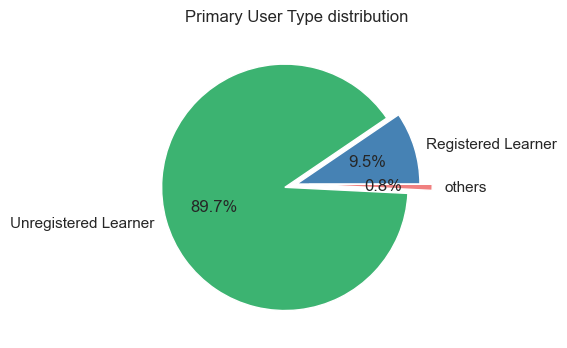

In [461]:
type_cnt = df_user['user_primary_type'].value_counts(normalize = True) * 100  #finding percentage of primary users distribution
type_pct = type_cnt.reset_index()

# here I am changing the 'user_primary_type' value to 'others' if percentage of users in any category is less than 5%
type_pct['user_primary_type'] = np.where(type_pct['proportion']<5.0,'others',type_pct['user_primary_type'])  
type_pct = pd.DataFrame(type_pct.groupby('user_primary_type')['proportion'].sum().reset_index())

#Pie plot to visualize the distribution of primary user types
plt.figure(figsize=(8,4))
plt.pie(type_pct['proportion'], labels = type_pct['user_primary_type'].value_counts().index, 
        radius=1, autopct='%1.1f%%', explode=(0,0.1,0.1))
plt.title('Primary User Type distribution')
plt.show()

Plot shows that unregistered learner cover **89.7%** of users following by registered learner **9.5%**.

#### 6.1.1.3 Analyzing 'region' and 'city' columns

- Column 'region' contains region codes representing the users' locations.
  - I am identifying the **top 10 regions** that have the highest number of users in the dataset. This helps in understanding the   distribution of users across various regions.
  - As per my understanding, decoding the region codes as follows:
    - MH: Maharashtra, UP: Uttar Pradesh, KA: Karnataka, TN: Tamil Nadu, DL: Delhi
- Column 'city' contains city of the user. 
  - I am identifying the **top 10 cities** from the 'city' column that have the highest number of users in the dataset. 
  - This helps in understanding the distribution of users across various cities.

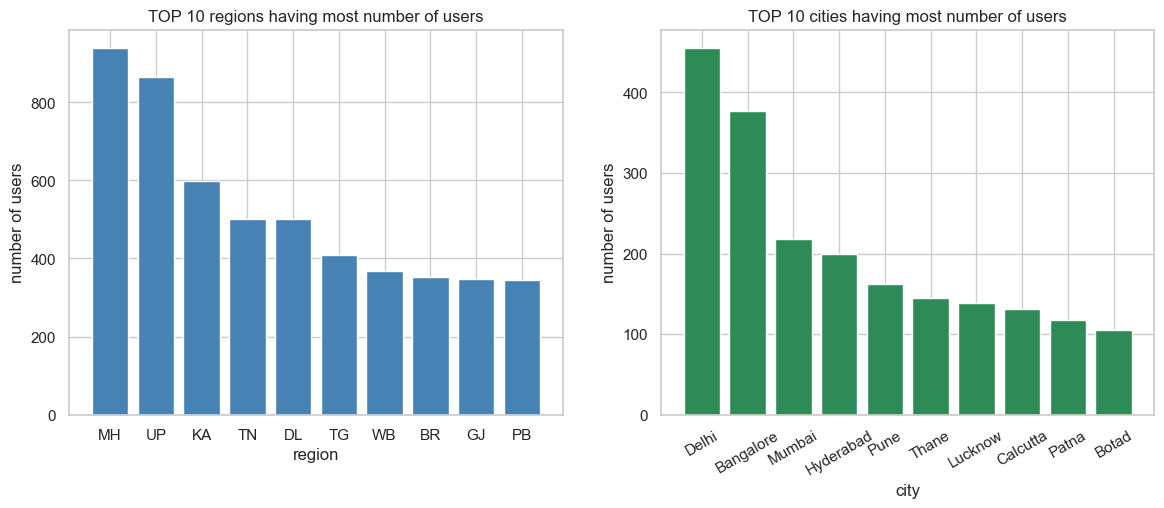

In [462]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5)) #createing sub plot

# Region wise distribution
#finding the total count of users in each region and getting top 10 regions
reg = df_user.region.value_counts()[0:10]
x = reg.index
y = reg
ax[0].bar(x,y) #bar plot
ax[0].set_title("TOP 10 regions having most number of users")
ax[0].set_xlabel("region")
ax[0].set_ylabel("number of users")

# city wise distribution
#finding the total count of unique users in each city and getting top 10 cities
city = df_user.city.value_counts()[0:10]
ax[1].bar(city.index,city,color='seagreen')
ax[1].set_title("TOP 10 cities having most number of users")
ax[1].set_xlabel("city")
ax[1].set_ylabel("number of users")
ax[1].tick_params(axis='x', rotation=30)

plt.show()

- **region:** regions **Maharashtra, Uttar Pradesh and Karnataka** contributes to maximum users on the platform. 

- **city:** cities **Delhi, Banaglore and Mumbai** contributes the maximum users on the platform

#### 6.1.1.4 Analyzing 'attributed_channel' column

- This column signifies the initial channel through which a user accessed the Khan Academy platform. 
- I aim to identify the most frequently used attributed channels.

In [463]:
df_user.attributed_channel.value_counts()[0:5] #getting the top 5 most popular channels

attributed_channel
organic search        4478
direct                2346
intra_ka               431
other KA marketing     204
website referral        95
Name: count, dtype: int64

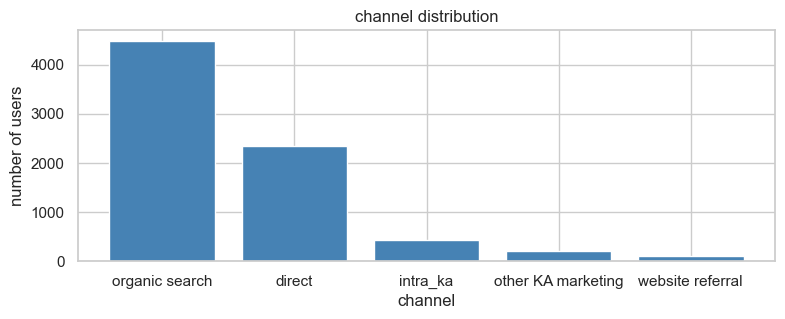

In [464]:
#finding the total count of unique users in each channel to get the most popular channel
chn = df_user.attributed_channel.value_counts()[0:5]
plt.figure(figsize=(9,3))
plt.bar(chn.index,chn)
plt.title("channel distribution")
plt.xlabel("channel")
plt.ylabel("number of users")
plt.xticks(rotation=0)
plt.show()

Highest number of users are coming to KA platform via organic search i.e., by search platforms like google, yahoo etc. 
Other popular channel is direct i.e., directly coming to KA platform using Khan academy platform links.

<a id='bivariate'></a>
### 6.1.2 Bivariate Analysis

Performing bivariate analysis to find the relationships and interactions between two columns. 

In [465]:
#defing a funtion to plot graph using contingency table created for bivariate analysis

"""For this, I am creating a contingency table using pd.crosstab() to show the relationship between the 2 categories 
being compared. Then, plotting a stacked bar chart to visualize the results."""


def plot(col1, col2, df_plot):
    # Creating a cross-tab (contingency table)
    cross_tab = pd.crosstab(df_plot[col1], df_plot[col2], normalize='all') * 100
    cross_tab['total_users'] = cross_tab.sum(axis=1)

    # I am sorting by the total count of users in ascending order (just for better analysis)
    cross_tab_sorted = cross_tab.sort_values(by='total_users', ascending=False)
    
    # Plot a stacked bar chart
    ax = cross_tab_sorted.drop(['total_users'], axis=1).plot(kind='bar', stacked=True, figsize=(10, 4))
    plt.xlabel(f'{col1}')
    plt.ylabel('Percentage')
    plt.title(f'Relationship between {col2} and {col1}')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title=f'{col2}', bbox_to_anchor=(1.02, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()
    print(cross_tab_sorted[0:3])
    

**6.1.2.1 attributed channel v/s registered users**

- I am examining the relationship between registered users and attributed channels, specifically investigating how attributed channels influence the distribution of user registrations.

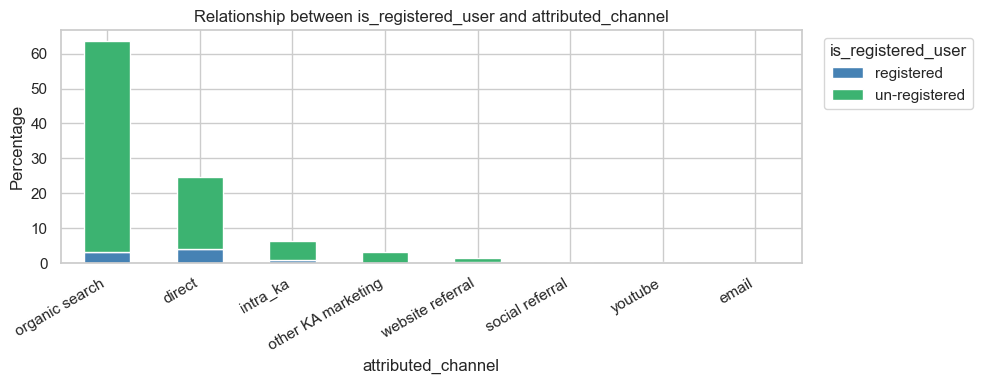

is_registered_user  registered  un-registered  total_users
attributed_channel                                        
organic search        3.275225      60.221870    63.497095
direct                4.173270      20.637436    24.810706
intra_ka              0.933263       5.511534     6.444797


In [466]:
plot('attributed_channel','is_registered_user', df) 

- A higher proportion of users are registered(4.1%) when they directly visit the KA platform compared to when they come through other attributed channels. This suggests that users who initiate their visit directly on the KA platform have a higher likelihood of becoming registered users.
- Organic_search channel have 2nd highest percentage of registered user(3.2%).
- While the number of users are more in 'Organic search' channel, the percentage of registered user is more in 'direct' channel.

#### 6.1.2.2 City v/s registered user
- I am examining the relationship between registered users and cities of users, specifically investigating how city influence the distribution of user registrations.
- Since there are many cities, I am taking only the top 10 cities found in analysis earlier

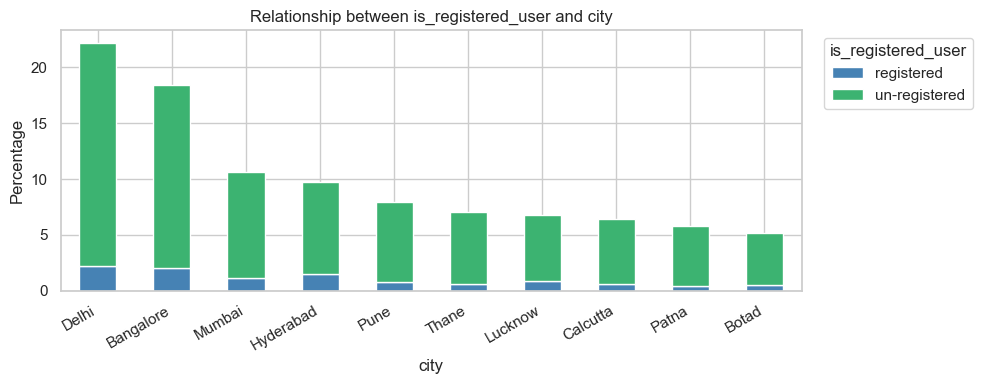

is_registered_user  registered  un-registered  total_users
city                                                      
Delhi                 2.244998      19.960957    22.205954
Bangalore             2.049780      16.349439    18.399219
Mumbai                1.171303       9.468033    10.639336


In [467]:
top_10_cities = ['Delhi','Bangalore','Mumbai','Hyderabad','Pune','Thane','Lucknow','Calcutta','Patna','Botad']
df_city = df_user[df_user['city'].isin(top_10_cities)]
plot('city','is_registered_user',df_city)

- Bangalore city has maximum registered users with 2.0% registered users, followed by Delhi which has 1.84% registered users

#### 6.1.2.3 Region v/s registered user
- I am examining the relationship between registered users and regions of users, specifically investigating how regions influence the distribution of user registrations.
- Since there are many regions, I am taking only the top 10 regions found in analysis earlier

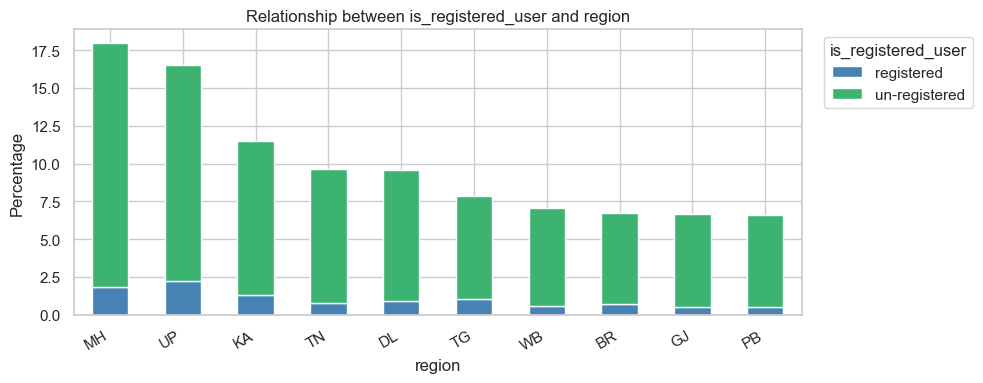

is_registered_user  registered  un-registered  total_users
region                                                    
MH                    1.836618      16.127798    17.964416
UP                    2.238378      14.291180    16.529558
KA                    1.339200      10.120528    11.459728


In [468]:
top_10_region = ['MH','UP','KA','TN','DL','TG','WB','BR','GJ','PB']
df_region = df_user[df_user['region'].isin(top_10_region)]
plot('region','is_registered_user',df_region)

While Delhi & Bangalore has highest number of registered users, it's interesting to see that state with highest amount of registered users is UP followed by Maharashta and Karnataka. 

<a id='usage'></a>
## 6.2 Usage Dataset
This dataset encompasses several aspects:

- Time and Activities: It tracks users' engagement in the first month, containing activities like watching videos, practicing questions, and reading notes.

- Device Information: It includes details about users' device types, operating systems, and other relevant device-related data.

- Usage Patterns: The column "is_detected_weekday_7am_3pm" holds Boolean values indicating if users are accessing the KA platform during weekdays between 7 am and 3 pm. This timeframe typically aligns with school hours, allowing an assessment of learners' engagement during school. 

In [469]:
usage.head(3)

,user_id,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts
0,kaid_543136637624086966998595,2021-01-06 00:00:00,0.009533,WATCHING,VIDEO,NaN,NaN,NaN,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 09:41:53,2021-01-06 10:13:19
1,kaid_543136637624086966998595,2021-01-06 00:00:00,14.042767,WATCHING,VIDEO,Math,Statistics and probability,Confidence intervals,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 09:41:52,2021-01-06 10:19:17
2,kaid_543136637624086966998595,2021-01-06 00:00:00,3.010483,WATCHING,VIDEO,Math,AP®︎ Statistics,Probability,en,web,Desktop Web (Non-Chromebook),Linux / Ubuntu / Other Distributions,False,2021-01-06 10:00:03,2021-01-06 10:03:05


In [470]:
#copying usage dataset to perform eda
df_usage = usage.copy()

### 6.2.1 Analysing basic metrics 

In [471]:
df_usage.shape

(16394, 15)

In [472]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16394 entries, 0 to 16393
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      16394 non-null  object 
 1   usage_date                   16394 non-null  object 
 2   total_mins                   16394 non-null  float64
 3   activity                     16394 non-null  object 
 4   content_type                 16374 non-null  object 
 5   domain_title                 14071 non-null  object 
 6   course_title                 14071 non-null  object 
 7   unit_title                   13864 non-null  object 
 8   locale                       16394 non-null  object 
 9   client                       16394 non-null  object 
 10  device_type                  16394 non-null  object 
 11  os                           16394 non-null  object 
 12  is_detected_weekday_7am_3pm  16394 non-null  bool   
 13  start_time_first

**Dataset size:** The dataset comprises 16,394 rows and 15 columns.

**Data Types:** The DataFrame contains a mixture of data types, including objects, a boolean type, and a floating-point number.

**Null Values:** Some columns have null values. Let's handle null vlaues.

In [473]:
df_usage.isnull().sum() #finding total null values present in each column

user_id                           0
usage_date                        0
total_mins                        0
activity                          0
content_type                     20
domain_title                   2323
course_title                   2323
unit_title                     2530
locale                            0
client                            0
device_type                       0
os                                0
is_detected_weekday_7am_3pm       0
start_time_first_ts               0
end_time_last_ts                  0
dtype: int64

### Handling null values:

- In the 'content_type' column, only 20 rows have null values, and since it's a categorical column, I can safely drop those rows.

- For the columns 'domain_title', 'course_title', and 'unit_title', I am going to investigate if these null values align across these columns, potentially indicating missing data for the same observations."

In [474]:
df_usage.dropna(subset=['content_type'], inplace=True) #dropping rows having null values in content_type column
#checking if values of domain_title and cousre_title are null at the same time
df_both_null = df_usage[df_usage['domain_title'].isnull() & df_usage['course_title'].isnull() & df_usage['unit_title'].isnull()] 
len(df_both_null)

2303

Since the number of null values in the columns 'domain_title', 'course_title', and 'unit_title' are consistent and correspond to the same set of rows, I can uniformly fill these null values with a default value. Let's use 'Unknown' as the default value and replace the null values with it.

In [475]:
default_value = 'Unknown' #setting default value

#replacing null values with default value
df_usage['domain_title'].fillna(default_value, inplace=True) 
df_usage['course_title'].fillna(default_value, inplace=True)
df_usage['unit_title'].fillna(default_value, inplace=True)

<a id='usageuni'></a>
### 6.2.5 Univariate analysis

**6.2.5.1 Analyzing 'total_mins' column**
- This column tells us the time spent by users in minutes in the first month
- I'm analyzing the 'total_mins' column to determine the time users spent in minutes during the first month. 
    - For this, I group the data by 'user_id' to calculate the total time spent by each user. 
    - Next, I calculate the total time spent based on different percentiles to understand the distribution of time spent.

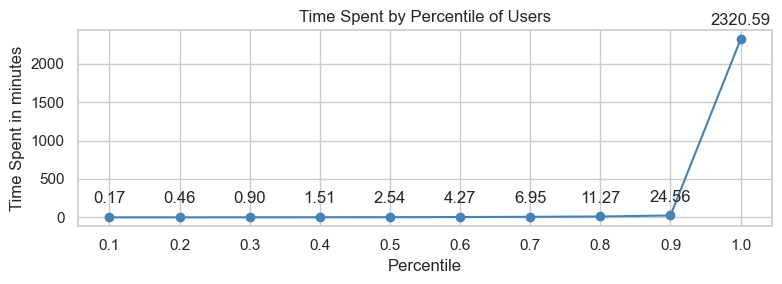

In [476]:
time_spend = df_usage.groupby('user_id')['total_mins'].sum().reset_index()

# Calculate percentiles
percentiles = np.linspace(0.1,1.0,10)
percentile_values = time_spend['total_mins'].quantile([p for p in percentiles])

# Plot the percentiles
plt.figure(figsize=(8, 3))
plt.plot(percentiles, percentile_values.values, marker='o')

# Add y-values as text to each node
for i, txt in enumerate(percentile_values.values):
    plt.annotate(f'{txt:.2f}', (percentiles[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Percentile')
plt.ylabel('Time Spent in minutes')
plt.title('Time Spent by Percentile of Users')
plt.xticks(percentiles)
plt.grid(True)
plt.tight_layout()

plt.show()


- Approximately **90%** of users spend **24.54 minutes** or less on the platform. Conversely, only the top **10%** of users spend **more than 24 minutes** on the platform. 

- Additionally, about 50% of users spend less than 2.54 minutes on the website.

### Outlier analysis

- I am conducting an outlier analysis on the dataset. I specifically focus on the 'total_mins' column to identify any outliers.
- For this, I am creating distribution plots to see if outliers exists.

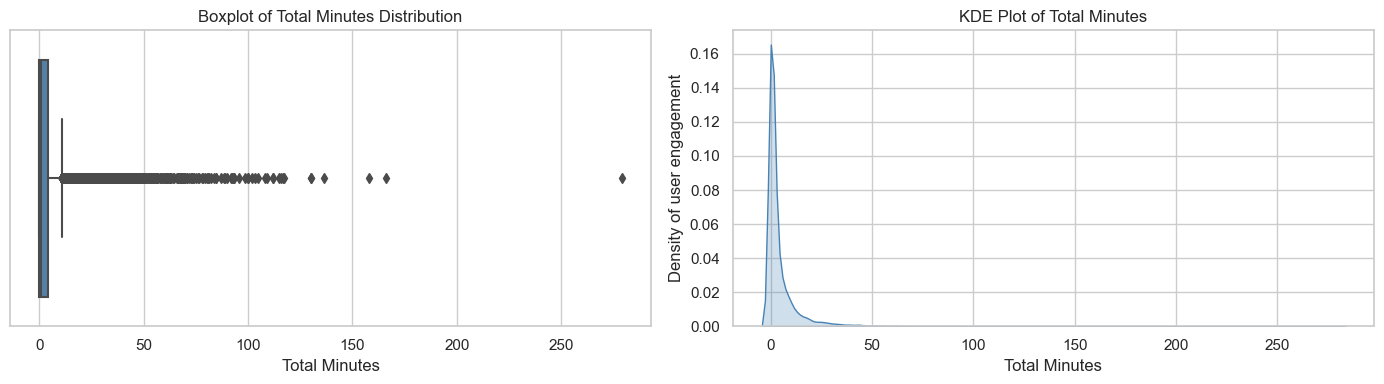

In [477]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4)) #createing sub plot

# Ploting boxplot to see time spent distribution
sns.boxplot(x=df_usage['total_mins'], ax=ax[0])
ax[0].set_xlabel('Total Minutes')
ax[0].set_title('Boxplot of Total Minutes Distribution')

# Ploting KDE
sns.kdeplot(df_usage['total_mins'], shade=True, ax=ax[1])
ax[1].set_xlabel('Total Minutes')
ax[1].set_ylabel('Density of user engagement')
ax[1].set_title('KDE Plot of Total Minutes')

plt.tight_layout()
plt.show()

I can observe significant skewness in the plots, indicating the likely presence of outliers. Let's further investigate the 'total_mins' column to assess whether removing outliers would enhance our analysis.

In [478]:
df_usage.total_mins.describe()

count    16374.000000
mean         4.476858
std          9.862074
min          0.000017
25%          0.148804
50%          0.953475
75%          4.377675
max        279.019260
Name: total_mins, dtype: float64

- In the analysis of user time spent on the platform, I can see that the **mean time spent is 4.4 minutes.** Approximately 50% of users spend around 0.95 minutes on the platform, showcasing a **wide range of engagement levels**. The maximum time spent is **279 minutes** (4.65 hours), and the minimum time spent is **0.000017 minutes.**

- Upon considering these values, they appear reasonable. Users can spend a maximum of 4.65 hours in a single session, and at the same time, they may visit the website briefly and leave within a few minutes.

- When I group users to observe the total time spent by each user in the first month (please refer to 'Time Spent by Percentile of Users' graph above), I observe that top 10% of users spend time between 30 minutes to 2320 minutes (38.6 hours). This distribution aligns with the expectation that users can dedicate this amount of time for studying over a month.

- Therefore, given that the outliers contribute valuable insights and removing them might lead to the loss of users who spend a substantial amount of time on the website, I choose **not to remove outliers** for this dataset to retain all information.

In [479]:
# creating a common function to plot a graph for user distribution by time spent in various categories
def user_time_spent(col,data):
    
    # Calculate the total sum of 'total_mins'
    total_time = data['total_mins'].sum()

    # Group by the new 'category' and calculate the percentage of 'total_mins' for each category
    percentage_total_mins = data.groupby(col)['total_mins'].sum() / total_time * 100
    percentage_total_mins = percentage_total_mins.sort_values(ascending=False)
#     print(percentage_total_mins)
    # Plot the data
    plt.figure(figsize=(9, 5))
    bars = plt.bar(percentage_total_mins.index, percentage_total_mins)
    plt.xlabel(col)
    plt.ylabel('Percentage of Total Time (%)')
    plt.title(f'Percentage of Total Time by {col}')

    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


**6.2.5.2 Analyzing activity and content_type column**
- **Activity:**
    - Next, I am analyzing the total time spent in different activities and content_type
    - To identify the most popular activities among learners based on the time they spend, I'm utilizing the 'activity' column, which describes the learner's activities such as watching, reading, programming, etc. 
    - I perform a group by operation on the 'activity' column and calculate the total time spent for each activity. This allows me to determine the activities in which learners invest the most time.
- **Content type:**
    - The column 'content_type' provides information about the type of content accessed by the learners, such as video, exercise, article, and more. I aim to determine the content type on which users spend the most time

- Activity and content type are closely related and considering this relation, I aim to group these categories to determine the most popular activity and content type among the learners.

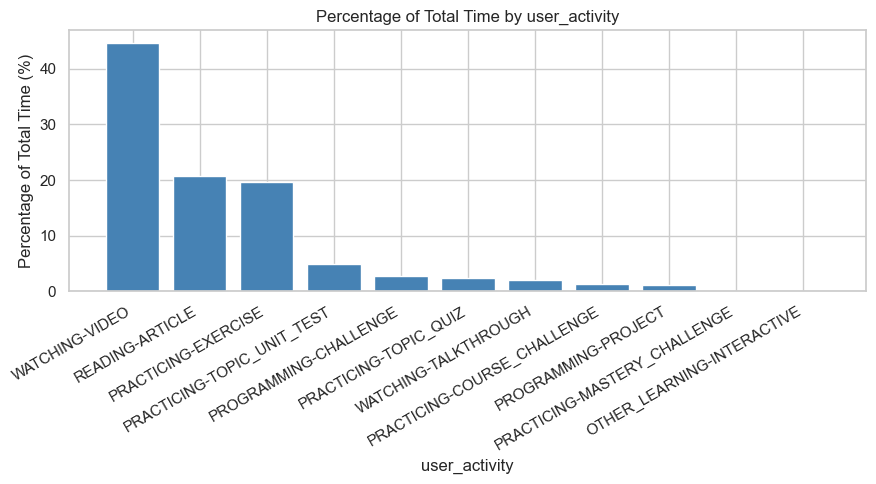

In [480]:
# Concatenate 'activity' and 'content_type' as a new category
df_usage['user_activity'] = df_usage['activity'] + '-' + df_usage['content_type']
user_time_spent('user_activity', df_usage)


The analysis indicates that the highest percentage of user time **(44.58%) is devoted to watching videos**, followed by **reading articles (20.68%)** and **practicing exercises (19.62%).**

These activities appear to be the most popular among learners, with a significant portion of their time spent on them. Subsequently, I can explore whether these prevalent learning activities have an influence on user retention rates.

 **6.2.5.3 Analyzing 'locale' column**
- I am analyzing the 'locale' column, which provides information about the language of the content being accessed by users.

- Locale is present in code, I assume the code as follows:
   - en: English, hi: Hindi, kn: Kannada, gu: gujrati
- I aim to find the percentage of time spent by learners in each language

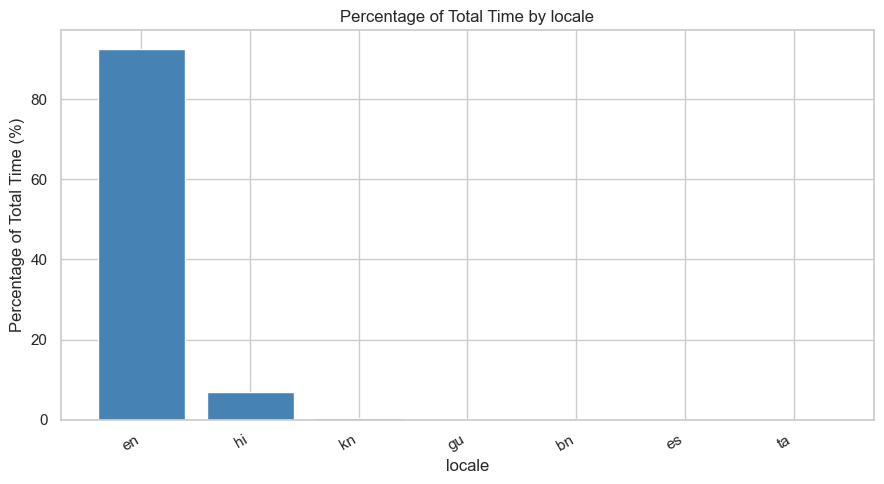

In [481]:
user_time_spent('locale', df_usage)

**92.54%** of learner's total time is spent in english content. This suggests that english is the most preferred language among users.

**6.2.5.4 Analyzing 'client', 'device_type' and 'os' columns**

- The 'client' column provides insights into whether users access the KA platform through the web or app.
  - Analyzing this column helps us determine the preferred and more user-friendly platform, either web or app, for accessing KA content.

- Column 'Device_type' contains data about which device user is using. This can be Desktop Web, Phone or Tablet. 
  - I'm Finding the most popular device among users
  - For this I am taking the top 3 device types

- Column 'os' tells about the Operating system intalled in the user's device.
   - I am to find the preferred OS in user's device 
   - I am taking the top 4 OS

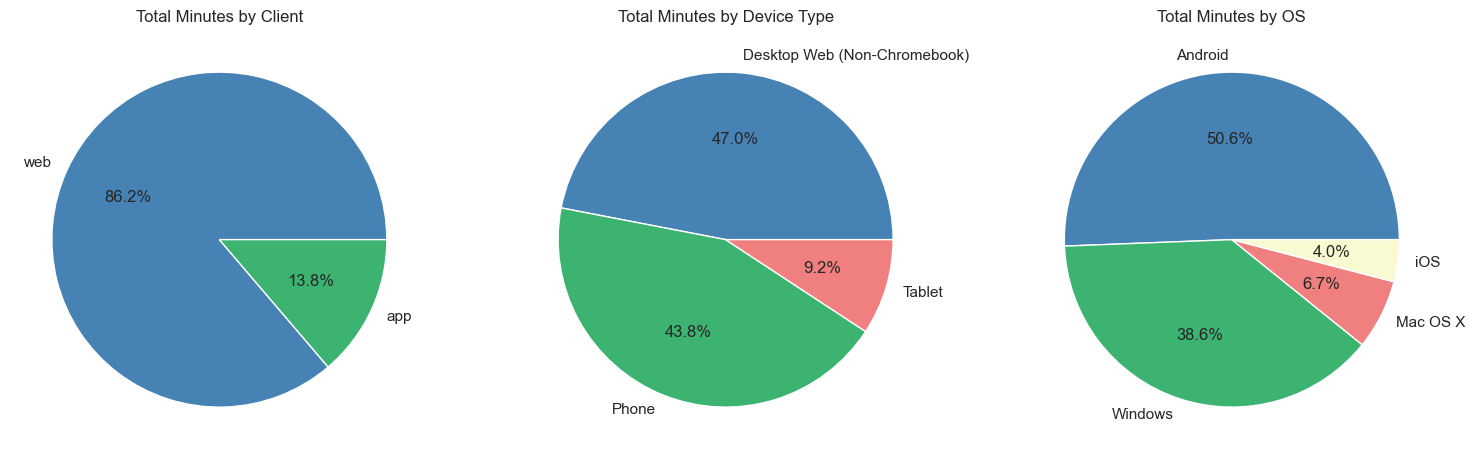

In [482]:
df_client = df_usage.groupby('client')['total_mins'].sum().sort_values(ascending=False).reset_index()
df_device = df_usage.groupby('device_type')['total_mins'].sum().sort_values(ascending=False).reset_index()[0:3]
df_os = df_usage.groupby('os')['total_mins'].sum().sort_values(ascending=False).reset_index()[0:4]

# Plotting the pie charts as subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'client'
axs[0].pie(df_client['total_mins'], labels=df_client['client'], autopct='%1.1f%%')
axs[0].set_title('Total Minutes by Client')

# Plot for 'device_type'
axs[1].pie(df_device['total_mins'], labels=df_device['device_type'], autopct='%1.1f%%')
axs[1].set_title('Total Minutes by Device Type')

# Plot for 'os'
axs[2].pie(df_os['total_mins'], labels=df_os['os'], autopct='%1.1f%%')
axs[2].set_title('Total Minutes by OS')

plt.tight_layout()
plt.show()


**Client:** _web_ is the most popular client type among the learners.

**Device Type:** The most prevalent device types are _desktop web_ and _phone_ among learners.

**OS:** _Android and Windows_ are the preferred operating systems among the learners' devices.

This suggests that the preferred device configuration includes a device categorized as either desktop web or phone, coupled with Android or Windows as the operating system, with the web as the client.

**6.2.5.5 Analyzing 'course_title' and 'domain_title' columns**

- I aim to provide insights into the specific courses and subject domains on which learners spent the most time on the platform.

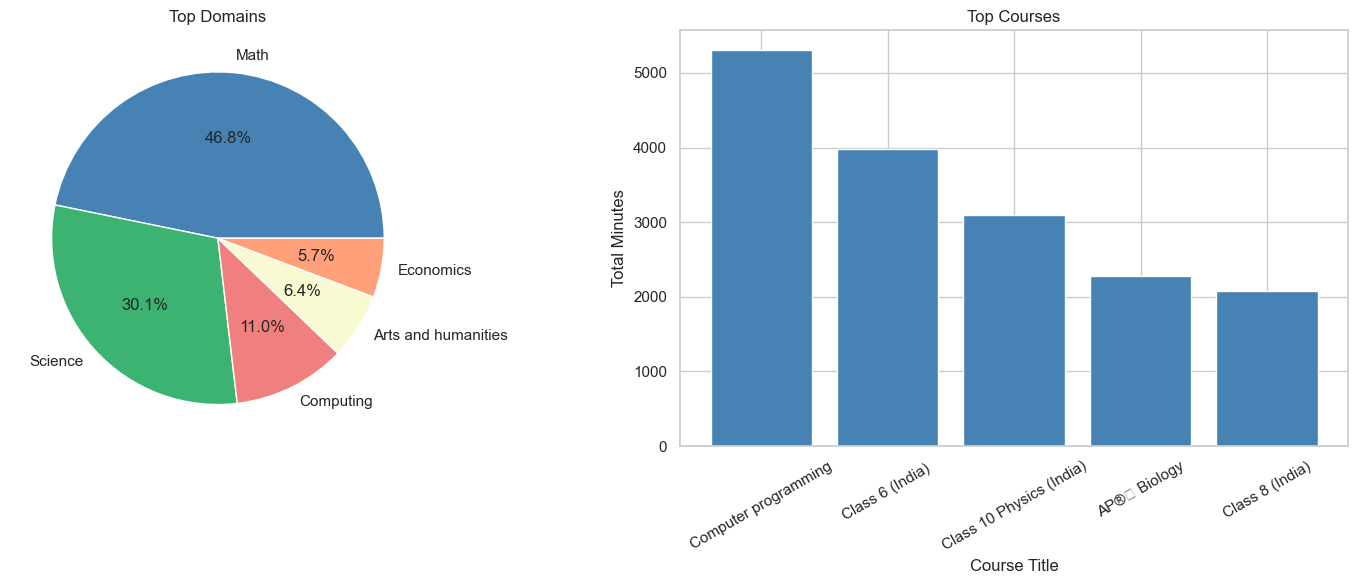

In [483]:
# finding the top 5 most popular course title among users
df_subj = df_usage.groupby(['course_title'])['total_mins'].sum().sort_values(ascending=False).reset_index()[0:5]

# finding the top 5 most popular domain title among users
df_domain = df_usage.groupby(['domain_title'])['total_mins'].sum().sort_values(ascending=False).reset_index()[0:5]

# Plot the graphs as subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for top domains using a pie chart
axs[0].pie(df_domain['total_mins'], labels=df_domain['domain_title'], autopct='%1.1f%%')
axs[0].set_title('Top Domains')


# Plot for top courses in each domain using a vertical bar chart (bar plot)
axs[1].bar(df_subj['course_title'], df_subj['total_mins'])
axs[1].set_xlabel('Course Title')
axs[1].set_ylabel('Total Minutes')
axs[1].set_title('Top Courses')
axs[1].tick_params(axis='x', rotation=30) 


plt.tight_layout()
plt.show()


- **Domain:** The most well-received domains are _Math, Science, & Computing_
- **Course title:** most favored courses are _Computer Programming, Class 6 (India) & AP Biology_. 

Later, I can explore the top courses in each domain to to find the most popular courses in domain and similarly I can find most popular unit titles in those courses. From this, I aim to find learning paths which are most popular among users

**6.2.5.6 Analyzing 'is_detected_weekday_7am_3pm' column**

- The column "is_detected_weekday_7am_3pm" contains boolean values indicating whether a learner is actively engaged on the website during typical school hours (7am to 3pm) on weekdays. 
- This information is crucial for monitoring and analyzing user engagement during core school hours, providing insights into the platform's usage patterns during educational periods

In [484]:
df_usage.groupby('is_detected_weekday_7am_3pm')['total_mins'].sum().sort_values(ascending=False).reset_index()

,is_detected_weekday_7am_3pm,total_mins
0,False,54257.772542
1,True,19046.300398


These numbers suggests that majority of time spent by learners is outside of school time.

<a id='engage'></a>
**6.2.5.7 Most Engaging hours: Analyzing 'start_time_first_ts' & 'end_time_last_ts' columns**
- These columns tells us the starting of user session time and ending of user session time respectively. 
- I can use this data to find out the time periods having high user activity on KA platform.
- For this I am plotting a bar graph for the time of the day (distributed in bins of 2 hours) and getting the total number of user activities within this time.

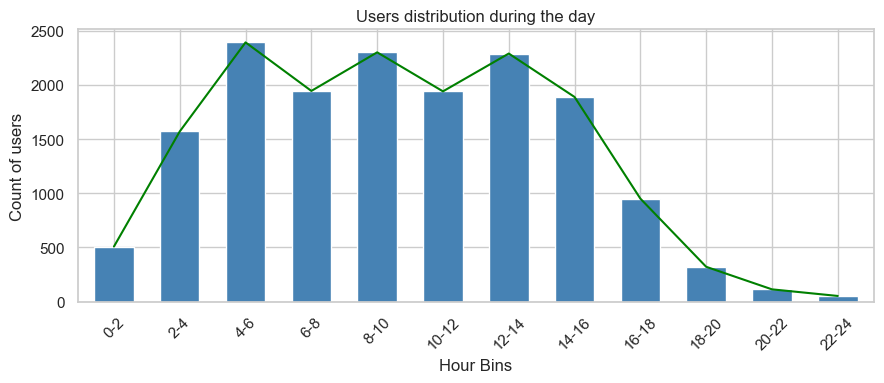

In [485]:
df_hour = df_usage.copy() #Creating a copy of dataset for this analysis to add few columns

data = pd.to_datetime(df_hour['start_time_first_ts']).dt.hour #getting the hour part from the datetime column

# Defining the bins as 0-24 hours with 2 hours bins
bin_edges = np.arange(0,25,2)

df_hour['hour_of_day'] = data

# Cutting the data into bins
df_hour['bin'] = pd.cut(df_hour['hour_of_day'], bins=bin_edges)

# Group by bin and count the number of users in that time frame
bin_counts = df_hour.groupby('bin')['user_id'].size()

plt.figure(figsize=(9, 4))
bin_counts.plot(kind='bar', width=0.6)
bin_counts.plot(kind='line', color='green')
plt.xlabel('Hour Bins')
plt.ylabel('Count of users')
plt.title('Users distribution during the day')
plt.xticks(range(len(bin_counts)), [f'{bin.left}-{bin.right}' for bin in bin_counts.index], rotation=45)
plt.tight_layout()
plt.show()


The analysis reveals that the highest number of users are active in **4 AM-6 AM** time slot, followed by **8 AM-10 AM** & **12 PM-2 PM**. This pattern suggests a **peak in user activity during the morning and early afternoon hours, gradually declining after 2 PM**.

<a id='learningpath'></a>
### 6.3 Most popular learning path among users

- **'domain_title', 'course_title', and 'unit_title'** 
  - Now, I aim to identify popular learning topics based on the columns 'domain_title', 'course_title', and 'unit_title'. 
  - For this, first I am taking the 3 most popular domains and then finding the top 3 courses having most number of users.

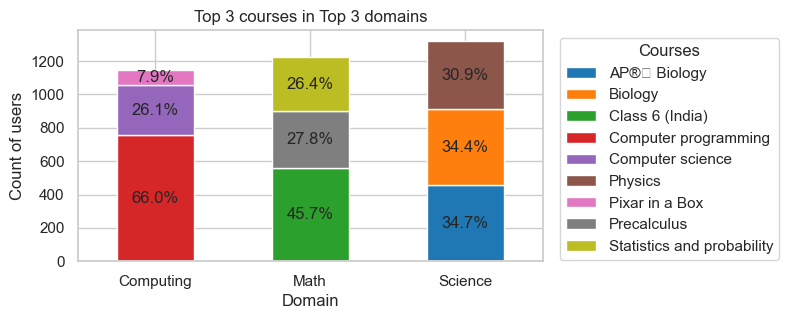

In [486]:
# As I have replaced null values with unknown, I am excluding those rows  for analyzing popular courses and domains
top_domain = df_usage[df_usage['domain_title'] != 'Unknown']['domain_title'].value_counts().nlargest(3).index
df_top_domain = df_usage[df_usage['domain_title'].isin(top_domain)] 
df_top_domain = df_top_domain.groupby(['domain_title', 'course_title']).size().groupby('domain_title').nlargest(3).reset_index(level=0, drop=True)

#defining colors for different legends
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# df_top_domain.unstack().plot(kind='bar', stacked=True, figsize=(6, 3),color=colors)

ax = df_top_domain.unstack().plot(kind='bar', stacked=True, figsize=(6, 3), color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    total_height = sum([patch.get_height() for patch in ax.patches if patch.get_x() == x])
    percentage = (height / total_height)* 100
    if percentage>0:
        ax.text(x + width / 2, y + height / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.xlabel('Domain')
plt.ylabel('Count of users')
plt.title('Top 3 courses in Top 3 domains')
plt.xticks(rotation=0)
plt.legend(title='Courses', bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.show()

Most popular learning choices:
1. Computing: 
    1. Computer programming
    2. Computer science
    3. Pixar in a Box
2. Math:
    1. Class 6 (India)
    2. Precalculus
    3. Statistics and probability
3. Science:
    1. AP®︎ Biology 
    2. Biology
    3. Physics

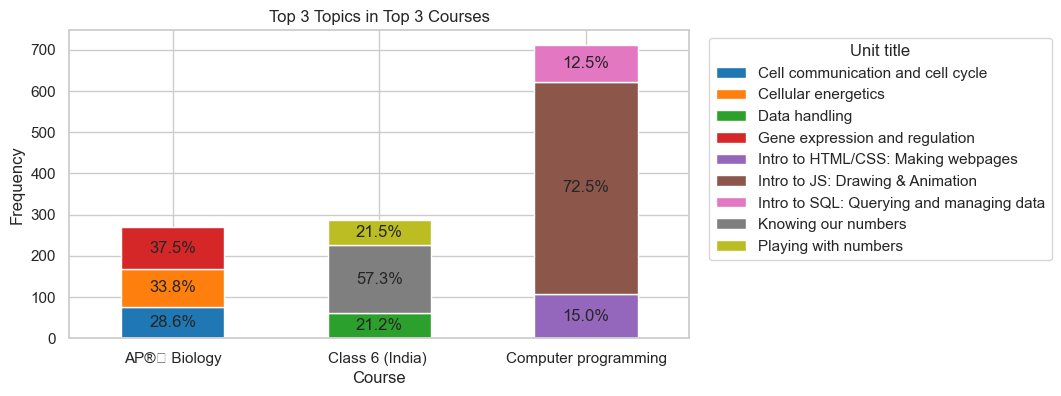

In [487]:
#similarly, to get the most popular learning path considering column 'unit_title',
#first I am taking the 3 most popular courses and then finding the top 3 unit_title having most time spent by users.

top_courses = df_usage[df_usage['course_title'] != 'Unknown']['course_title'].value_counts().nlargest(3).index
df_top_courses = df_usage[df_usage['course_title'].isin(top_courses)]
df_top_courses = df_top_courses.groupby(['course_title', 'unit_title']).size().groupby('course_title').nlargest(3).reset_index(level=0, drop=True)

ax = df_top_courses.unstack().plot(kind='bar', stacked=True, figsize=(8, 4), color = colors)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    total_height = sum([patch.get_height() for patch in ax.patches if patch.get_x() == x])
    percentage = (height / total_height)* 100
    if percentage>0:
        ax.text(x + width / 2, y + height / 2, f'{percentage:.1f}%', ha='center', va='center')
plt.xlabel('Course')
plt.ylabel('Frequency')
plt.title('Top 3 Topics in Top 3 Courses')
plt.legend(title='Unit title', bbox_to_anchor=(1.02, 1.0), loc='upper left')
plt.xticks(rotation=0)
plt.show()

**Most popular learning path:**
1. Computing ---> Computer programming
    1. Intro to JS: Drawing & Animation
    2. Intro to HTML/CSS: Making webpages
    3. Intro to SQL: Querying and managing data
2. Math ---> Class 6 (India)
    1. Knowing our numbers
    2. Playing with numbers
    3. Data handling
3. Science ---> AP Biology
    1. Gene expression and regulation
    2. Cellular energetics
    3. Cell communication and cell cycle

Now, I am merging user and usage datasets. From this, I aim to find user's usage behavior w.r.t different categories

In [488]:
#merging df_user (user) and df_usage (usage) datasets
df_merge = df_user.merge(df_usage)

In [489]:
df_merge.head(3)

,user_id,first_use_ts,is_registered_user,user_primary_type,country_cd,region,city,attributed_channel,usage_date,total_mins,...,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts,user_activity
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,un-registered,Unregistered Learner,IN,GA,Navelim,organic search,2021-01-18 00:00:00,10.047566,...,AP®︎ Biology,Gene expression and regulation,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-18 03:10:24,2021-01-18 03:20:27,READING-ARTICLE
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,un-registered,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.000017,...,Unknown,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-04 11:31:30,2021-01-04 11:31:30,READING-ARTICLE
2,kaid_1167642368311104946092969,2021-01-04 06:13:35,un-registered,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.002133,...,Unknown,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-04 11:11:14,2021-01-04 11:24:49,WATCHING-VIDEO


<a id='time'></a>
### 6.4 Time spent by Registered and Un-Registered Users
- finding the total time spent on the platform by registered and unregistered users 

In [490]:
# Group by 'is_registered_user' and calculate the average total time spent
usage_by_registration = df_merge.groupby('is_registered_user')['total_mins'].mean()

print("Usage Patterns by Registered and Un-Registered Users:")
usage_by_registration

Usage Patterns by Registered and Un-Registered Users:


is_registered_user
registered       5.313637
un-registered    4.215767
Name: total_mins, dtype: float64

Interesting to see that despite the higher number of unregistered users(89.7%) on the platform, the data reveals that registered users(10.29%), **on average, spend more time(5.3 mins)** on the platform.

<a id='outcome'></a>
## 6.5 Outcome Dataset

- This dataset contains the information of 3rd month retention of users. 
- It contains value 0 if user notretained in 3rd month and value 1 if user retained in 3rd month

In [491]:
outcome.head(3)

,user_id,m3_retained
0,kaid_1061303340925871095830606,0
1,kaid_1057179999781987835968845,0
2,kaid_1057007930883161077415453,0


In [492]:
#copying outcome dataset into df_outcome for analysis
df_outcome = outcome.copy()

### 6.5.1 Analyzing basic metrics

In [493]:
df_outcome.shape

(7612, 2)

Dataset contains 7612 rows and 2 columns

In [494]:
df_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7612 entries, 0 to 7611
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      7612 non-null   object
 1   m3_retained  7612 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


No null values present in our dataset

In [495]:
#changing 'm3_retained' column values for better understanding
# 0 : not retained
# 1 : retained
df_outcome['m3_retained'] = np.where(df_outcome['m3_retained']==0,'not retained', 'retained')

<a id='rrr'></a>
### 6.5.2 Retained v/s Not-retained user distribution

First,I am finding the percentage of users retained in 3rd month to get an over all picture of retention status.

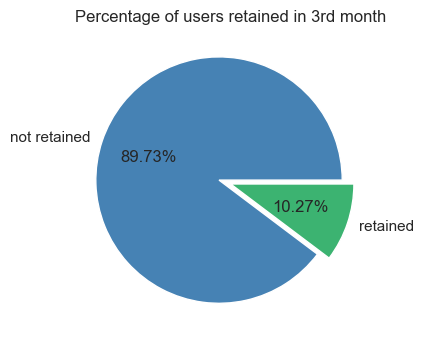

In [496]:
#finding percentage of retained and not-retained users in 3rd month
value_counts_percentage = df_outcome.m3_retained.value_counts(normalize=True) * 100

# Ploting a pie chart 
plt.figure(figsize=(5,4))
plt.pie(value_counts_percentage, labels = value_counts_percentage.index, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Percentage of users retained in 3rd month')
plt.ylabel('') 
plt.show()

Approximately **90%** of users do not continue into the 3rd month, while around **10%** of users remain retained.

Now, I aim to find out user segments based on user retention by merging the users, usage, and outcome datasets.

In [497]:
data = df_merge.merge(df_outcome)
data.head(3)

,user_id,first_use_ts,is_registered_user,user_primary_type,country_cd,region,city,attributed_channel,usage_date,total_mins,...,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts,user_activity,m3_retained
0,kaid_1172977777831184091024959,2021-01-18 03:10:00,un-registered,Unregistered Learner,IN,GA,Navelim,organic search,2021-01-18 00:00:00,10.047566,...,Gene expression and regulation,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-18 03:10:24,2021-01-18 03:20:27,READING-ARTICLE,not retained
1,kaid_1167642368311104946092969,2021-01-04 06:13:35,un-registered,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.000017,...,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-04 11:31:30,2021-01-04 11:31:30,READING-ARTICLE,not retained
2,kaid_1167642368311104946092969,2021-01-04 06:13:35,un-registered,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.002133,...,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-04 11:11:14,2021-01-04 11:24:49,WATCHING-VIDEO,not retained


<a id='time-r'></a>
### 6.5.3 Average time spent by retained v/s not retained users

In [498]:
# Group by 'm3_retained' and calculate the average total minutes
usage_by_retention = data.groupby('m3_retained')['total_mins'].mean().reset_index()

print("Usage Patterns by Retention:")
usage_by_retention

Usage Patterns by Retention:


,m3_retained,total_mins
0,not retained,4.178941
1,retained,5.877441


While the majority of users are not retained(89.73%), an intriguing observation is that retained users(10.27%) spend more time on average on the platform **(5.8 minutes)** compared to non-retained users **(4.1 minutes)**

Now, the data that I have has repeated user_ids. Till now, I was grouping the categories to find the total or average time spent by the users. But, now I want to find the how these categories impact user retention. So, now I want to consider unique users to find how various data points impact user retention in 3rd month. So, I will drop these repeated user ids.

In [499]:
#dropping the duplicate user_id values in the merged dataframe for further analysis 
df_retain = data.drop_duplicates(subset=['user_id'])

<a id='segment'></a>
## 6.6 User segments contribution to 3rd month retention

<a id='registered'></a>

### 6.6.1 User retention by user registration
- I aim to find that among the registered users, how many are retained to check if we are able to retain 
  registered users in 3rd month or not.

In [500]:
retention = df_retain.groupby('is_registered_user')['m3_retained'].value_counts(normalize=True)*100

print("Retention by registeration")
retention

Retention by registeration


is_registered_user  m3_retained 
registered          not retained    77.906977
                    retained        22.093023
un-registered       not retained    91.535929
                    retained         8.464071
Name: proportion, dtype: float64

I can see a ratio of 78:22 between not retained and retained users for registered users, whereas for un-registered users, the ratio skews to 92:8. This indicates a **higher retention rate for registered users** in the third month.

Now, I am going to do comparisions between 'm3_retained' and other categorical columns 
to find out user behavior in first month leading to user retention in 3rd month

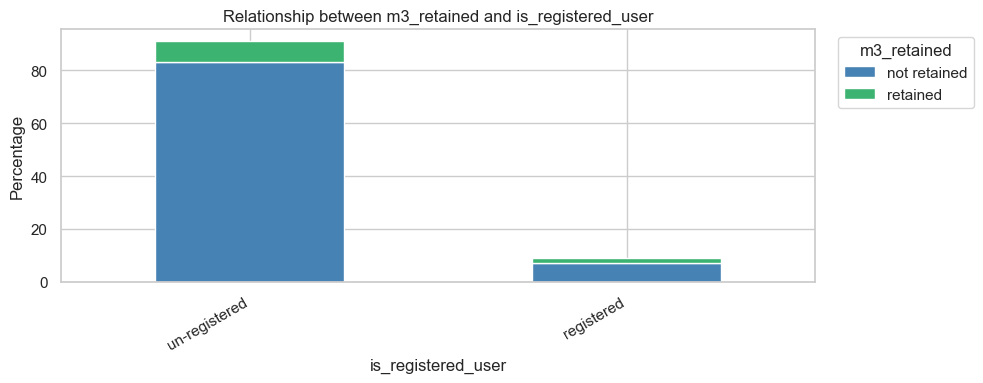

m3_retained         not retained  retained  total_users
is_registered_user                                     
un-registered          83.218877  7.695017    90.913893
registered              7.078711  2.007396     9.086107


In [501]:
plot('is_registered_user','m3_retained', df_retain) #using the plot funtion defined above

- Users who registered in the first month have 2% retained users while un-registered users have 7% retained users.
- From this, if we calculate the retention rate of registered users, it is **22%** whereas for un-registered users, its **8%** 

<a id='ac'></a>
### 6.6.2 user retention by attributed_channel 

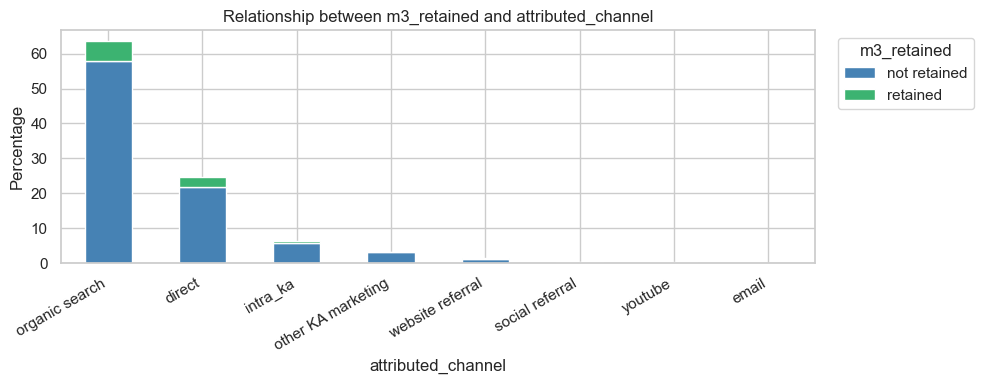

m3_retained         not retained  retained  total_users
attributed_channel                                     
organic search         57.827082  5.670012    63.497095
direct                 21.782004  3.028702    24.810706
intra_ka                5.810882  0.633914     6.444797


In [502]:
retention = df_retain.groupby('attributed_channel')['m3_retained'].value_counts(normalize=True)*100

# print(retention)
plot('attributed_channel','m3_retained',df_retain)

- retention is 5% in Organic search channel while its 3% in direct channel
- From this analysis, I can see that retention rate for organic search is 8.9% while retention rate for direct channel is 12.2% 

<a id=rd></a>
### 6.6.3 User retention by domain

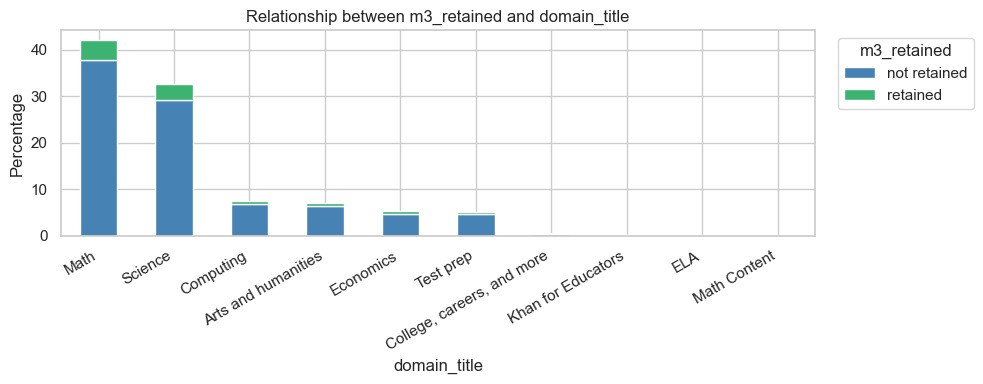

m3_retained   not retained  retained  total_users
domain_title                                     
Math             37.836161  4.199421    42.035581
Science          29.189077  3.371949    32.561026
Computing         6.805958  0.641291     7.447249


In [503]:
df_domain = df_retain[df_retain['domain_title']!='Unknown']
retention = df_domain.groupby('domain_title')['m3_retained'].value_counts(normalize=True)*100
# print(retention)
plot('domain_title','m3_retained', df_domain)

- Math, Science & computing domain shows user retention in 3rd month
- user retention in math is 4.1% while in Science is 3.3%
- Retention rate for math is 9.9% , for science is 10.35%  while for computing is 8.6%

<a id='rc'></a>
### 6.6.4 User retention by course title

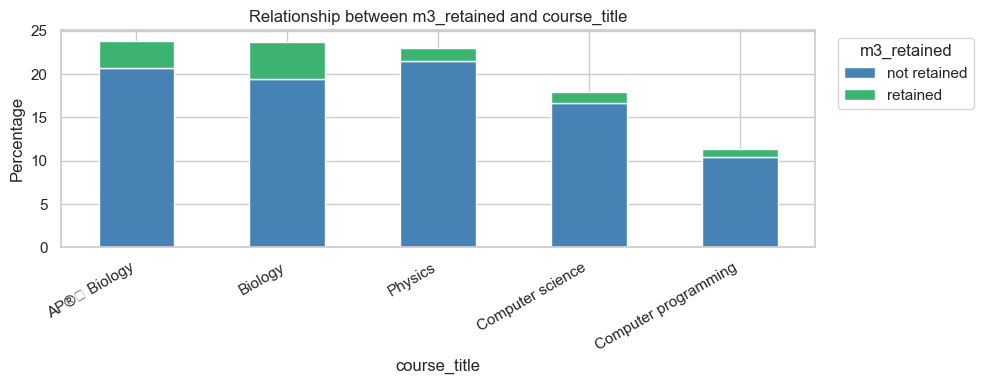

m3_retained   not retained  retained  total_users
course_title                                     
AP®︎ Biology     20.661157  3.202479    23.863636
Biology          19.421488  4.338843    23.760331
Physics          21.487603  1.549587    23.037190


In [504]:
courses = ['AP®︎ Biology','Class 6 (India)','Computer programming','Biology', 'Computer science', 'Physics']
df_courses = df_retain[df_retain['course_title'].isin(courses)]
retention = df_courses.groupby('course_title')['m3_retained'].value_counts(normalize=True)*100
# print(retention)
plot('course_title','m3_retained',df_courses)

- AP Biology, Biology and Physics have highest percentage of users retained in 3rd month
- 4.3% users are retained in Biology, 3.2% retained in AP Biology and 1.5% retained in Physics
- retention rate for course AP Biology is 13%, for biology it is 18% and for physics it is 6%

<a id='ra'></a>
### 6.6.5 User retention by user activity

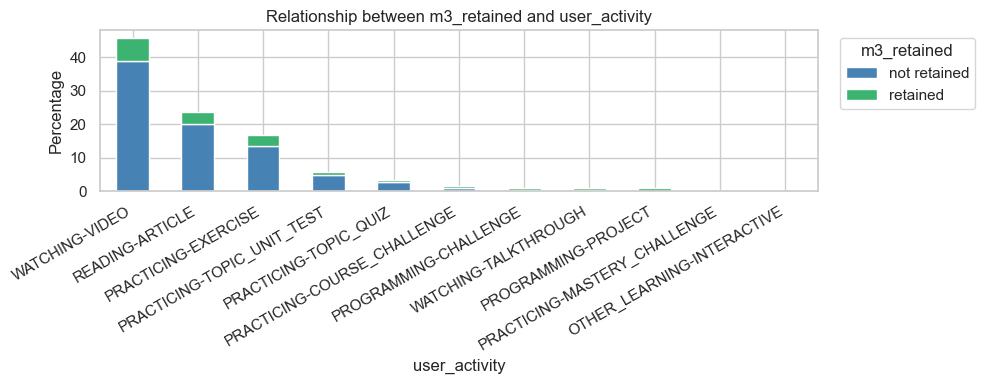

m3_retained          not retained  retained  total_users
user_activity                                           
WATCHING-VIDEO          38.719922  6.943936    45.663857
READING-ARTICLE         20.221082  3.511665    23.732747
PRACTICING-EXERCISE     13.637474  3.035300    16.672774


In [505]:
retention = data.groupby('user_activity')['m3_retained'].value_counts(normalize=True)*100
# print(retention)
plot('user_activity','m3_retained', data)

- Watching video activity and content type has highest user retention in 3rd month.
- WATCHING-VIDEO has around 7% retention while READING-ARTICLE has 3.5% retention followed by PRACTICING-EXERCISE with 3% retention
- retention rate in watching-video is 15%, reading article is 14.7% and practicing exercise is 18%

<a id='rclient'></a>
### 6.6.6 User retention by client 

client  m3_retained 
app     not retained    73.650794
        retained        26.349206
web     not retained    91.275168
        retained         8.724832
Name: proportion, dtype: float64


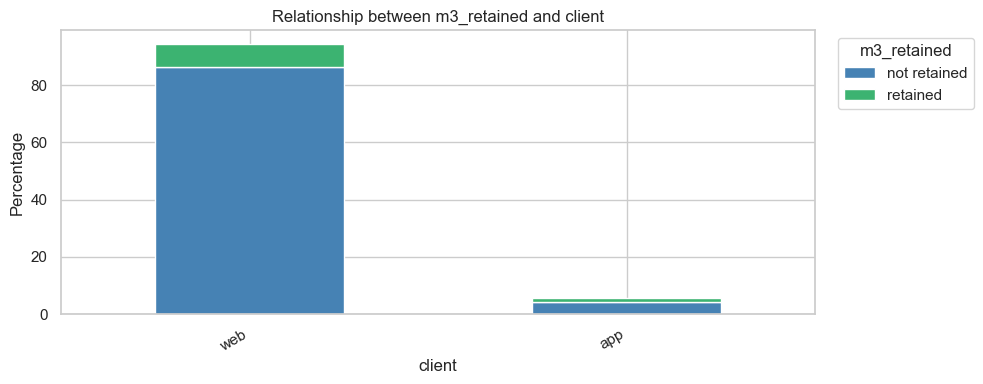

m3_retained  not retained  retained  total_users
client                                          
web             86.212361  8.240887    94.453249
app              4.085226  1.461525     5.546751


In [506]:
retention = df_retain.groupby('client')['m3_retained'].value_counts(normalize=True)*100
print(retention)
plot('client','m3_retained', df_retain)

- Web client has 8% retained users in 3rd month while app has 1.4% retained users
- This suggests that users accessing KA platform through web have higher chances of getting retained in 3rd month
- Although retained users are less in App, retention rate of app is more i.e., 26% compared to retention rate of web which is 8.72%

<a id='region'></a>
### 6.6.7 User retention by region

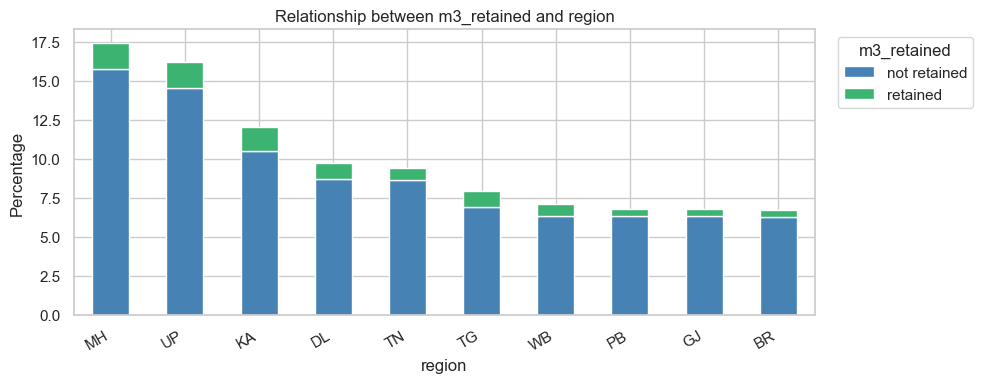

m3_retained  not retained  retained  total_users
region                                          
MH              15.749235  1.656473    17.405708
UP              14.525994  1.681957    16.207951
KA              10.474006  1.554536    12.028542


In [507]:
top_10_region = ['MH','UP','KA','TN','DL','TG','WB','BR','GJ','PB']
df_region = df_retain[df_retain['region'].isin(top_10_region)]
retention = df_region.groupby('region')['m3_retained'].value_counts(normalize=True)*100
# print(retention)
plot('region','m3_retained',df_region)

- This shows that 17.4% retained users are from Maharashtra, 16.2% are from UP and around 12% from Karnataka.
- This means that 3rd month user retention rate of Maharashtra is 9.5%, of UP is 10.3% and of Karnataka, it is around 13%

<a id='bin'></a>
### 6.6.8 User retention by hourly usage 

- I'm trying to find the reation between user retention and user engagement hours.
- For this, I'm using df_hour dataset (created above) for getting the bin of users engagement hours and 
  comparing it with retention status of those users.

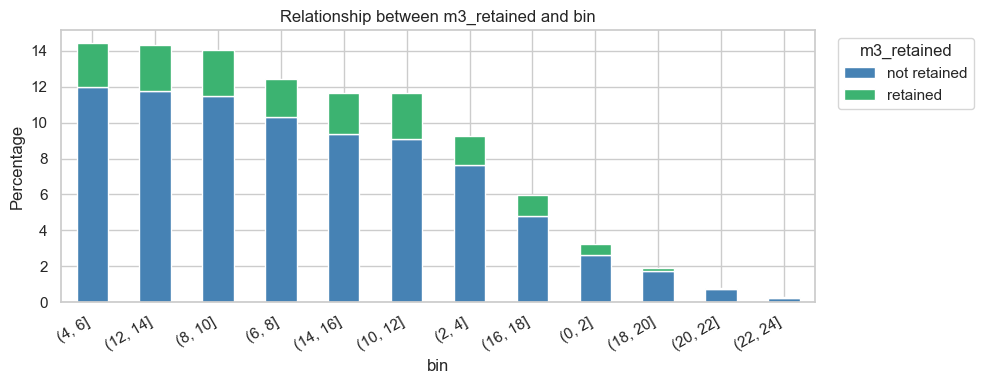

m3_retained  not retained  retained  total_users
bin                                             
(4, 6]          12.008235  2.403873    14.412108
(12, 14]        11.780090  2.559679    14.339770
(8, 10]         11.485171  2.581938    14.067108


In [508]:
df_bins = df_hour.merge(data)  

# df4 = temp.merge(outcome, on='user_id')
plot('bin','m3_retained', df_bins)

This results shows that between the time period of 4am-2pm have around 14% retained users. After calculation, I found that user retention is around 16% for this time period.

<a id='recom'></a>
### 7. Recommendations to improve month 3 retention

1. **Focus on user registration:**
    - The dataset contains around 90% unregistered users and 10% registered users in 1st month but my analysis shows that there is 22% chance of retaining a registered user as compared to only 8% in case of unregistered user. So, there are high chances of retaining a registered user. This is shown and explained
         - I would recommend to focus on increasing user registration in their 1st month after joining. 
     - Retention Programs:
         - Encourage unregistered users to register by showcasing the benefits of registration such as personalized learning, progress tracking, and more. 
         - Offer incentives to boost registrations. 
2. **Strengthen Content and Domain-Specific Engagement:**
    - The dataset contains various domains among which top 3 domains are Math, Science & Computing. These subjects covers 87.9% of total time spent by users.
    - My analysis shows that users that spent most time on Maths, Science and computing have higher changes of month 3 retention. 
      - So, I recommend to ensure that the courses related to Math, Science, and Computing are engaging and informative
      - Consider leveraging machine learning algorithms to recommend relevant content that aligns with each user's interests, potentially increasing engagement and retention.
    - Target Marketting:
      - Focus marketing efforts on promoting courses in Math, Science, and Computing to reach the target audience more effectively.
3. **Long-term Learning Paths:**
     - Develop long-term learning paths or programs that guide users through a structured educational journey. 
     - Provide milestones, badges, or certifications to incentivize and acknowledge user progress. This can help users stay engaged for extended periods.
4. **Optimize Organic Search and Direct Channel Strategies:**
   - My analysis shows that Organic search and direct channels show better user retention. 
       - Focus on improving the content and search engine optimization (SEO) strategies to attract and engage users through these channels. 
       - Invest in keyword research and quality content creation to maintain or even improve retention rates in these channels.
      
5. **Improve the Web User Experience:**
    - My analysis shows that web client shows a significantly higher retention rate compared to the app. 
        - Focus on enhancing the web user experience by optimizing website speed, responsiveness, and functionality. 
        - Additionally, consider offering exclusive features or content to web users to further incentivize their engagement.

6. **User Segmentation and A/B Testing:** 
     - I recommend to segment users based on their behavior and preferences(as explained and concluded above), and conduct A/B testing to understand what interventions are most effective. 
     - Test different strategies for user engagement and retention, tracking the impact of changes on different user groups.    


<a id='info'></a>
### 8. Additional information: 
**If I had access to more information, what other data points might I want to have for better 
understanding of user's 3rd month retention?**

1. **User Satisfaction: Ratings and feedback provided by users.**
    - If I have data of course/domain rating, low rated courses can be identified and improved accordingly.
    - If I can get access to user's feedbacks, I would be able to gain insights into **user preferences and pain points.**
    - I can also perform simple sentiment analysis on user's feedbacks, to get an overall idea of how the platform is being received by the users.
    - This can also help me understand why users are not getting retained on the platform and ultimately how to increase user retention.

2. **Progress data for long term engagement:**
    - If I have user's progress data related to user's completed lessons or modules, I can recommend related or advance modules/courses to keep the user engaged in long term
    
3. **User Behavior Over Time**:
      - Having the track  of user behavior over multiple months (may be half-year data) would help me to identify trends and changes in retention patterns over time.

<a id='ML'></a>
## 9. Machine learning prediction model (future scope)
I have also trained a simple machine learning model where I am taking the relevant columns found through this case study which impact usr retention in 3rd month. Using these data points, I am trying to predict 3rd month retention of users. 

This model is using logistic regression technique to predict the retention status of users. 

**Results:**

- In the cases where **'m3_retained' is false**, model is giving precision of 83% and recall of 99%. Which means, in the cases where model is predicting that user will not be retained after 3 months, it is performing with 83% accuracy and out of all the cases where the user is not retained, it is able to catch 99% of such cases.
- In the cases where **'m3_retained' is true**, model is giving precision of 83% and recall of 12%. Which means, in the cases where model is predicting that user is retained after 3 months, it is performing with 83% accuracy and out of all the cases where the user is retained, it is able to catch 12% of such cases.

- Overall accuracy of the model: 83%
- f1 score: 77% 

Currently this model is not giving very accurate results, but with more user data to train the model, this model can be refined and user retention predictions can be improved.

**NOTE:** Detailed analysis of this model can be found in 'PredictionModel.ipynb' Notebook.